# 모델 평가와 특성 공학

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from scipy import sparse

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

## 교차검증(K-Fold cross-validation)

- k개의 부분 집합으로 분할
- 테스트 / 훈련을 번갈아가면서 사용 > 10겹이면 90%를 훈련에 사용....
- 모델이 훈련 데이터에 대한 민감도 파악
- 최악과 최선 예측



- train_test_split = 무작위라 공정하지 않음...

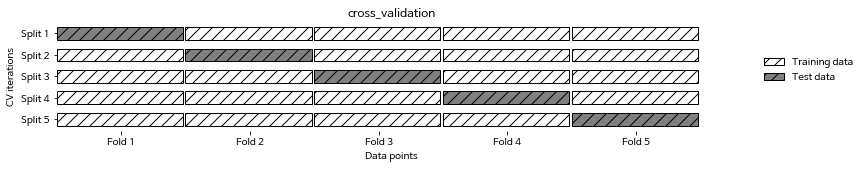

In [2]:
mglearn.plots.plot_cross_validation()

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)

print("테스트 세트 점수 : {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수 : 0.88


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg=LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차 검증 점수 : \n", scores)

print("최소 = {:.3f}".format(scores.min()))
print("평균 = {:.3f}".format(scores.mean()))
print("최대 = {:.3f}".format(scores.max()))

# 10번 교차 검증한 점수

교차 검증 점수 : 
 [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
최소 = 0.933
평균 = 0.973
최대 = 1.000


In [13]:
from sklearn.model_selection import cross_validate

scores = cross_validate(logreg, iris.data, iris.target, cv=5,
                        return_train_score=True)

display(scores)

{'fit_time': array([0.06198883, 0.06500006, 0.04200053, 0.03299379, 0.02799869]),
 'score_time': array([0.0009973 , 0.00100183, 0.00100088, 0.00100207, 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

cross validate는 cross val score과 비슷하지만 훈련과 테스트에 걸린 시간과 점수를 딕셔너리로 반환함

### 계층별 k겹 교차 검증

- 클래스 비율을 전체 데이터 셋의 비율과 같도록 나눔
- train_test_split의 stratify 설정과 비슷한 맥락
- 클래스가 테스트나 훈련 한 군데에 몰릴 수 있음

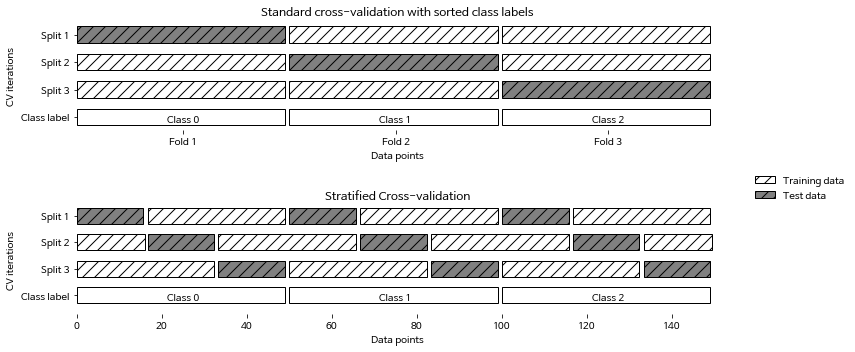

In [14]:
mglearn.plots.plot_stratified_cross_validation()

위와 같이 클래스별 비율을 고려하여 데이터를 나눈다..

In [26]:
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=5)
skf_split = skf.get_n_splits(iris.data, iris.target)

display(skf_split)

split_data = skf.split(iris.data, iris.target)


scores = []
for train_index, test_index in split_data:
   # print("TRAIN:", train_index, "TEST:", test_index)
    X_train = iris.data[train_index]
    X_test = iris.data[test_index]
    y_train = iris.target[train_index]
    y_test = iris.target[test_index]
    reg  = LogisticRegression(max_iter=1000).fit(X_train, y_train)

    scores.append(reg.score(X_test, y_test))
    
    
print("StraitifedKFold 점수 \n",scores)

# split하면 훈련, 테스트 각각의 인덱스를 반환하는 오브젝트 리턴

scores= np.array(scores)

print("최소 = {:.3f}".format(scores.min()))
print("평균 = {:.3f}".format(scores.mean()))
print("최대 = {:.3f}".format(scores.max()))

5

StraitifedKFold 점수 
 [0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 1.0]
최소 = 0.933
평균 = 0.973
최대 = 1.000


어쩌고 설명

## K-fold

- StratifiedKFold 는 분류에 쓰고 회귀에는 단순한 KFold를 적용

In [37]:
from sklearn.model_selection import KFold


logreg = LogisticRegression(max_iter=1000)

kfold = KFold(n_splits=3)
print("교차 검증 점수 : \n", cross_val_score(logreg, iris.data, iris.target,
                                      cv = kfold))


kfold = KFold(n_splits=5)
print("교차 검증 점수 : \n", cross_val_score(logreg, iris.data, iris.target,
                                      cv = kfold))


kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수 : \n", cross_val_score(logreg, iris.data, iris.target,
                                      cv = kfold))

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
print("교차 검증 점수 : \n", cross_val_score(logreg, iris.data, iris.target,
                                      cv = kfold))

교차 검증 점수 : 
 [0. 0. 0.]
교차 검증 점수 : 
 [1.         1.         0.86666667 0.93333333 0.83333333]
교차 검증 점수 : 
 [0.98 0.96 0.96]
교차 검증 점수 : 
 [1.         0.83333333 1.         1.         0.93333333]


shuffle의 기본값이 false이고 iris target값은 클래스끼리 모여있기 때문에 클래스 하나씩에 대응되어 아무것도 학습이 안 된다.


그래서 shuffle =True로 주고 random_state를 고정해서 같은 작업을 재현한다 

## 홀드아웃, LOOCV  LeaveOneOut

- 홀드아웃? 2개로 나누기
- Loocv ? 하나의 샘플을 하나의 폴드로 보고 하나를 테스트, 나머지를 훈련으로 사용

In [84]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print("교차 검증 분할 횟수 : ", len(scores))
print("평균 : ", scores.mean())

교차 검증 분할 횟수 :  150
평균 :  0.9666666666666667


## 임의 분할 교차 검증 ShuffleSplit

- 데이터를 100% 쓰지 않을수 있음. test_size , train_size 각각 설정 가능


- ShuffleSplit > 테스트, 훈련 비율!
- StratifiedShuffleSplit > 클래스 비율!

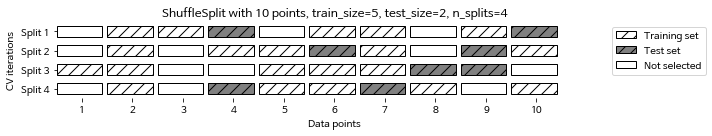

In [40]:
mglearn.plots.plot_shuffle_split()

위와 같이 아예 선택되지 않는 데이터가 생김

In [41]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=ss)


print("교차 검증 분할 횟수 : ", len(scores))
print("교차 검증 점수 : \n", scores)
print("평균 : ", scores.mean())

교차 검증 분할 횟수 :  10
교차 검증 점수 : 
 [0.97333333 0.96       0.96       0.96       0.96       0.97333333
 0.96       0.96       0.94666667 0.93333333]
평균 :  0.9586666666666668


## 그룹별 교차 검증 GroupKFold

- 데이터 내의 연관 그룹이 있을 경우
- 입력 특성에 따라 폴드를 나눠야하는
- 만약 사람의 얼굴일 경우 훈련 데이터에 있는 얼굴을 테스트에도 사용하면 성능 측정이 잘 할 수 없어서..

In [54]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)

print(y)
groups = [0,0,0,1,1,1,1,2,2,3,3,3] # 그룹!
print(groups)

scores = cross_val_score(logreg, X, y, groups, cv = GroupKFold(n_splits=3))

print(scores)

[1 0 2 0 0 1 1 2 0 2 2 1]
[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
[0.75       0.6        0.66666667]


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


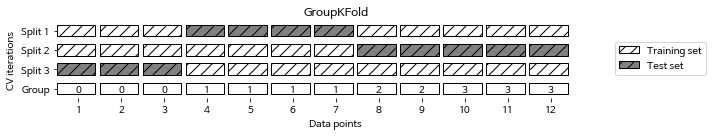

In [47]:
mglearn.plots.plot_group_kfold()

그룹별로 폴드를 나눠서 사용함

## Grid Search

- 매개변수 튜닝으로 모델 성능향상
- 매개변수 조합 시도! - 가장 성능이 높은 조합 찾기
- 반복문으로 구현할수도 있지만 가장 좋은 테스트 점수를 선택하는 과정에서 이미 테스트를 사용했기 때문에 새로운 테스트 데이터까지 결과가 이어지지 않을 수 있음

In [55]:
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   random_state=0)

print("훈련 세트의 크기 : {}, 테스트 세트의 크기 : {}".format(
                X_train.shape, X_test.shape))

best = 0
best_param={}

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(C=C, gamma=gamma).fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best:
            best = score
            best_param = {'C' : C, 'gamma' : gamma}
            
print("Best Score : ", best)
print("Best Parameter : ", best_param)

훈련 세트의 크기 : (112, 4), 테스트 세트의 크기 : (38, 4)
Best Score :  0.9736842105263158
Best Parameter :  {'C': 100, 'gamma': 0.001}


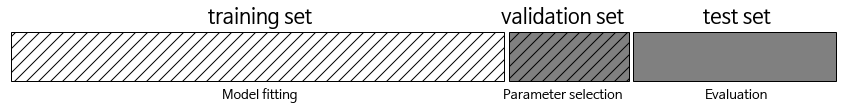

In [56]:
mglearn.plots.plot_threefold_split()

데이터를 전부 사용하지 않기 위해서 훈련, 검증(매개변수를 선택), 테스트로 나누어서 사용한다

In [57]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target,
                                                   random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("훈련 세트의 크기 : {}, 검증 세트 크기 : {},  테스트 세트의 크기 : {}".format(
                X_train.shape, X_valid.shape, X_test.shape))



훈련 세트의 크기 : (84, 4), 검증 세트 크기 : (28, 4),  테스트 세트의 크기 : (38, 4)


훈련 / 테스트로 나누고 나누어진 훈련테스트를 다시 훈련/검증으로 나눈다

In [64]:
best = 0
best_param={}

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(C=C, gamma=gamma).fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best:
            best = score
            best_param = {'C' : C, 'gamma' : gamma}
            
print("Best Score : ", best)
print("Best Parameter : ", best_param)

svm = SVC(C=best_param['C'], gamma = best_param['gamma'])
svm.fit(X_trainval, y_trainval)
print("테스트 세트 점수 : ", svm.score(X_test, y_test))

Best Score :  0.9642857142857143
Best Parameter :  {'C': 10, 'gamma': 0.001}
테스트 세트 점수 :  0.9210526315789473


검증 데이터에 대한 최고 점수로 파라미터를 구하고 최적의 파라미터로 테스트 데이터 점수를 구한다

In [66]:
best = 0
best_param={}

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(C=C, gamma=gamma)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score =scores.mean()  # 교차 검증 평균값으로 최고값 비교
        if score > best:
            best = score
            best_param = {'C' : C, 'gamma' : gamma}
            
print("Best Score : ", best)
print("Best Parameter : ", best_param)

svm = SVC(C=best_param['C'], gamma = best_param['gamma'])
svm.fit(X_trainval, y_trainval)
print("테스트 세트 점수 : ", svm.score(X_test, y_test))

Best Score :  0.9731225296442687
Best Parameter :  {'C': 10, 'gamma': 0.1}
테스트 세트 점수 :  0.9736842105263158


In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
              }

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

X_train, X_test,y_train, y_test = train_test_split(iris.data, iris.target,
                                                  random_state=0)

grid_search.fit(X_train, y_train)

print("테스트 세트 점수 : ", grid_search.score(X_test, y_test))
print("최적 매개변수 ", grid_search.best_params_)
print("최적 교차 검증 점수 ", grid_search.best_score_)
print("최적 성능 모델 ", grid_search.best_estimator_)

테스트 세트 점수 :  0.9736842105263158
최적 매개변수  {'C': 10, 'gamma': 0.1}
최적 교차 검증 점수  0.9731225296442687
최적 성능 모델  SVC(C=10, gamma=0.1)


In [70]:
res = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(res.head()))

,0,1,2,3,4
mean_fit_time,0.002287,0.003254,0.003355,0.003044,0.003293
std_fit_time,0.000822,0.001197,0.001035,0.000683,0.001462
mean_score_time,0.000553,0.001234,0.001621,0.001592,0.001498
std_score_time,0.00046,0.000355,0.000509,0.000754,0.000464
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


5번의 교차 검증에 대한 결과

- 각각의 파라미터와 테스트/훈련 점수들

GridSearchCV 

- best_params_, best_score_, best_estimator_

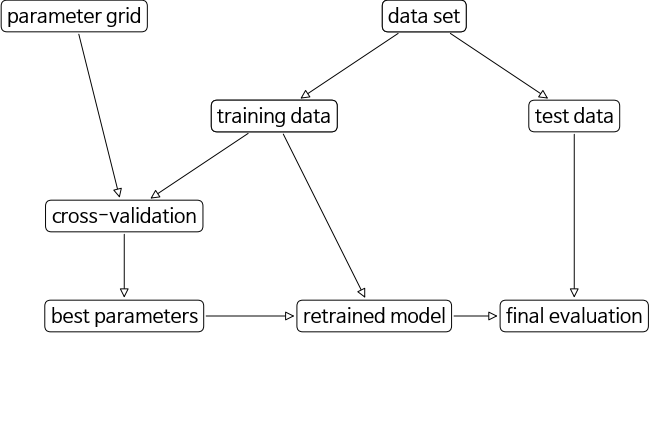

In [69]:
mglearn.plots.plot_grid_search_overview()

1. 데이터셋 훈련-데이터로 나눔
2. 훈련 데이터를 훈련/검증으로 나눔
3. 매개변수 그리드로 교차 검증을 하며 최적의 매개변수를 구함
4. 최종 모델을 학습하는데 훈련+검증 데이터를 함께 씀(중요! 훈련 데이터 늘리기)
5. 테스트 데이터에 대한 결과를 도출

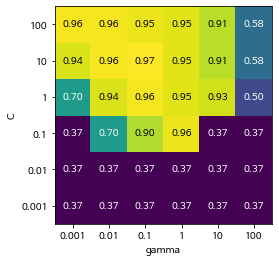

In [71]:
scores = np.array(res.mean_test_score).reshape(6,6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                     ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

밝은 색은 정확도가 높은 것, 어두운 것은 낮음

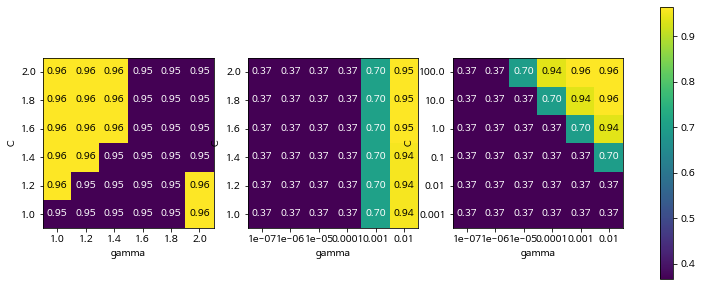

In [79]:
fig, axes = plt.subplots(1,3,figsize=(13,5))

param_grid_linear = { 'C' : np.linspace(1,2,6),
             'gamma': np.linspace(1,2,6)
              }

param_grid_one_log = {
             'C' : np.linspace(1,2,6),
             'gamma': np.logspace(-7,-2,6)
                }

param_grid_range = {
             'C' : np.logspace(-3,2,6),
             'gamma': np.logspace(-7,-2,6)
                }


for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    # 그리드 생성
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train) #훈련 데이터 적용
    scores = grid_search.cv_results_['mean_test_score'].reshape(-6,6)
    
    score_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C',
                                         xticklabels=param_grid['gamma'],
                      yticklabels=param_grid['C'], cmap='viridis', ax=ax)
    
    
plt.colorbar(score_image, ax=axes.tolist())   
    

1. 변화가 거의 없음... 0.95 0.96만 존재.. 
2. gamma는 잘 설정됐는데 c의 영향이 없어서 수직
3. 왼쪽 부분의 점수가 많이 떨어짐


! 스케일 조정 필요

In [80]:
param_grid = [
            {'kernel':['rbf'],
             'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
             {
               'kernel':['linear'],
                 'C':[0.001, 0.01, 0.1, 1, 10, 100],  
             }
            ]

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print("최적 파라미터:", grid_search.best_params_)
print("최적 파라미터:", grid_search.best_score_)

print("테스트 점수 : ", grid_search.score(X_test, y_test))

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최적 파라미터: 0.9731225296442687
테스트 점수 :  0.9736842105263158


+커널 파라미터도 조정해서 사용 가능함

## 중첩 교차 검증

- gridsearch에 바로 훈련하는 것이 아니라 cross validation을 적용하여서 사용함

In [82]:

param_grid = { 'C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
              }

scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                        iris.data, iris.target, cv=5)

print("교차 검증 점수", scores)
print("교차 검증 평균 점수", scores.mean())


교차 검증 점수 [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수 0.9800000000000001


C와 gamma 6X6 / grid search 내부 교차 5번 / 밖 교차 5번

36X5X5 = 900

## 교차검증, 그리드서치 병렬화

- 연산이 많아서...
- cross_val_score과 GridSearchCV의 n_jobs 파라미터로 CPU 코어수 지정 가능